In [1]:
## The following code ensures that all functions and init files are reloaded before executions.
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from insitupy import InSituData, InSituExperiment, CACHE
import scanpy as sc
from tqdm import tqdm

## Add histological annotations

In [3]:
data_path = Path(r"out/crc_data_pp_rounded/")

In [4]:
exp = InSituExperiment.read(data_path)
exp.load_all()

100%|██████████| 7/7 [00:17<00:00,  2.50s/it]


## Plot spatial embedding

In [5]:
from insitupy.plotting import plot_spatial
import matplotlib.pyplot as plt

Synchronized colors for key 'majority_voting_simple' and palette 'tab20_mod'.
Saving figure to file figures/spatial-all-majority_voting_simple.png
Saved.


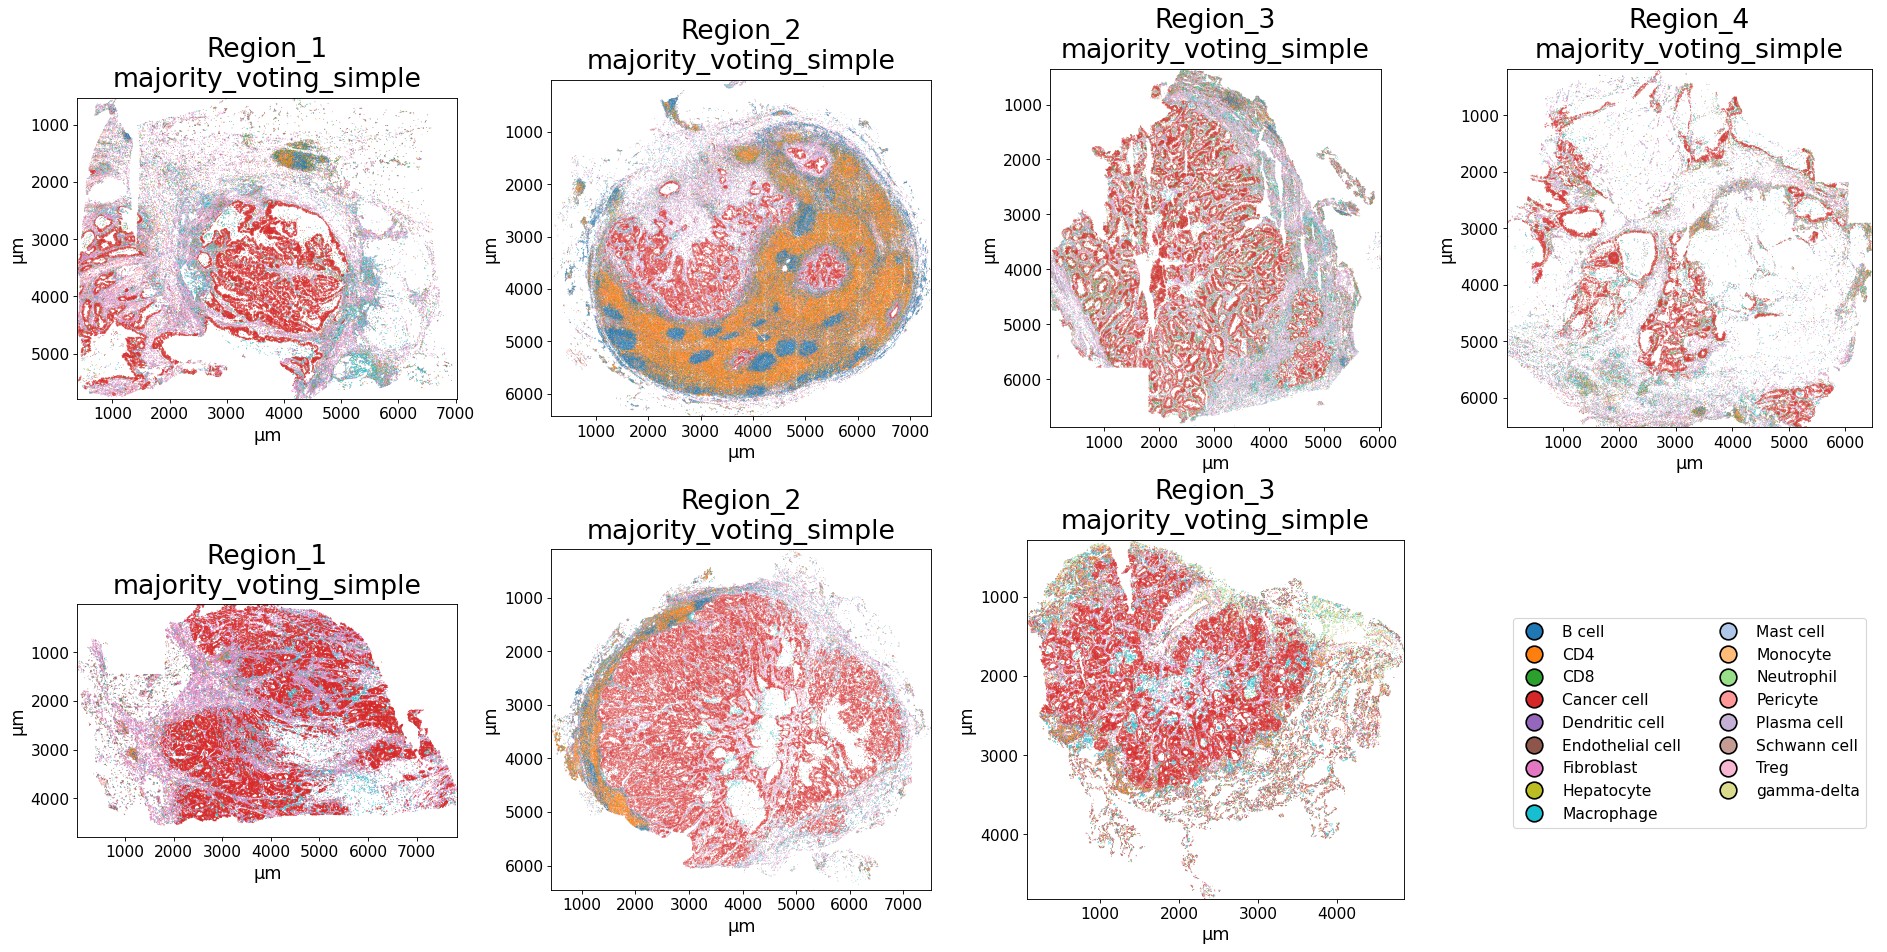

In [6]:
plot_spatial(exp,
             cells_layer="proseg",
             keys="majority_voting_simple", spot_size=12,
             savepath="figures/spatial-all-majority_voting_simple.png"
             )

## Add pathological annotations

Annotations were generated by a pathologists and can be accessed under the GEO accession number [GSE300906](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE300906). The path of the `geojson` files can then be added to the metadata using a configuration `xlsx`/`csv` file and the `append_metadata` function of `InSituPy`. In the example below it is assumed that the files are in `data/annotations/` in the repository folder. A configuration file template with relative paths is provided in `data/import_annotations_config.csv`.

### Add paths to QuPath annotations to `.metadata`

In [7]:
exp.append_metadata(
    new_metadata=Path(r"./csv/import_annotations_config.csv"), by=None
)

C:\Users\ge37voy\Github\InSituPy\insitupy\_core\insituexperiment.py:384: UserWarning: No 'by' column provided. Metadata will be paired by order.
  warnings.warn("No 'by' column provided. Metadata will be paired by order.")


### Import annotations by iterating through the `InSituExperiment` object

In [8]:
for meta, xd in exp.iterdata():
    print(xd.sample_id)
    annotations_path = Path(meta["annotations_Tanja"]).resolve()
    xd.import_annotations(
        annotations_path, keys="Tanja", scale_factor=0.2125
    )

Region_1
Region_2
Region_3
Region_4
Region_1
Region_2
Region_3


In [9]:
exp.annotations

0: Region_1
       Tanja:	119 annotations, 6 classes ('Fat', 'Immune cells', 'Mucus', 'Peritumoral Zone', 'Tumor', 'Tumor buds') 
1: Region_2
       Tanja:	169 annotations, 5 classes ('Fat', 'Immune cells', 'Peritumoral Zone', 'Tumor', 'Tumor buds') 
2: Region_3
       Tanja:	80 annotations, 3 classes ('Peritumoral Zone', 'Tumor', 'Tumor buds') 
3: Region_4
       Tanja:	165 annotations, 6 classes ('Immune cells', 'Mucus', 'Necrosis', 'Peritumoral Zone', 'Tumor', 'Tumor buds') 
4: Region_1
       Tanja:	380 annotations, 8 classes ('Fat', 'Immune cells', 'Necrosis', 'Peritumoral Zone', 'Stroma', 'Tumor', 'Tumor buds', 'Vessels') 
5: Region_2
       Tanja:	31 annotations, 4 classes ('Immune cells', 'Peritumoral Zone', 'Tumor', 'Tumor buds') 
6: Region_3
       Tanja:	76 annotations, 8 classes ('Adjacent normal tissue', 'Immune cells', 'Necrosis', 'Peritumoral Zone', 'Stroma', 'Tumor', 'Tumor buds', 'Vessels') 



In [10]:
exp.show(0)

In [11]:
from insitupy.plotting import plot_cellular_composition

Saving figure to file figures/cellcomp-one_dataset-no_annotations.pdf
Saved.


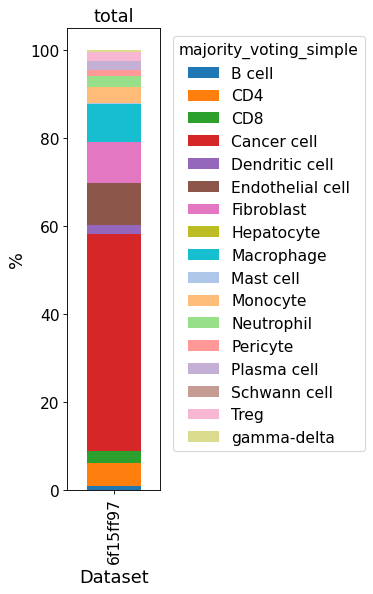

In [28]:
plot_cellular_composition(
    data=xd,
    cell_type_col="majority_voting_simple",
    palette=exp.colors["majority_voting_simple"],
    cells_layer="proseg",
    plot_type="bar",
    savepath="figures/cellcomp-one_dataset-no_annotations.pdf"
)

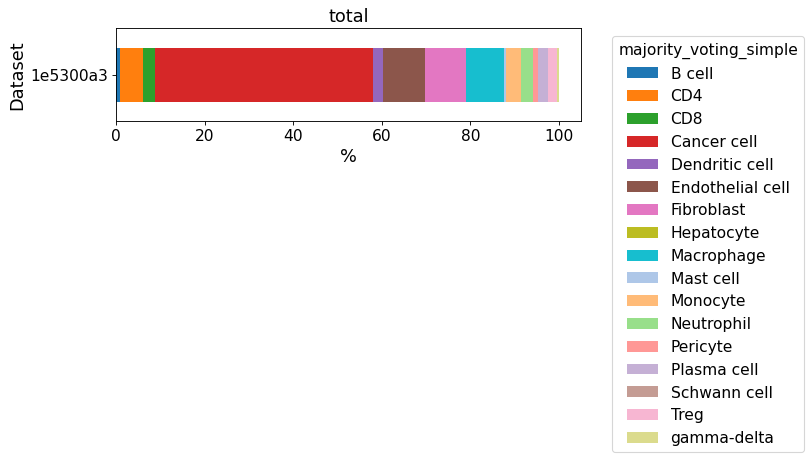

In [29]:
plot_cellular_composition(
    data=xd, cell_type_col="majority_voting_simple",
    palette=exp.colors["majority_voting_simple"],
    cells_layer="proseg",
    plot_type="barh",
)

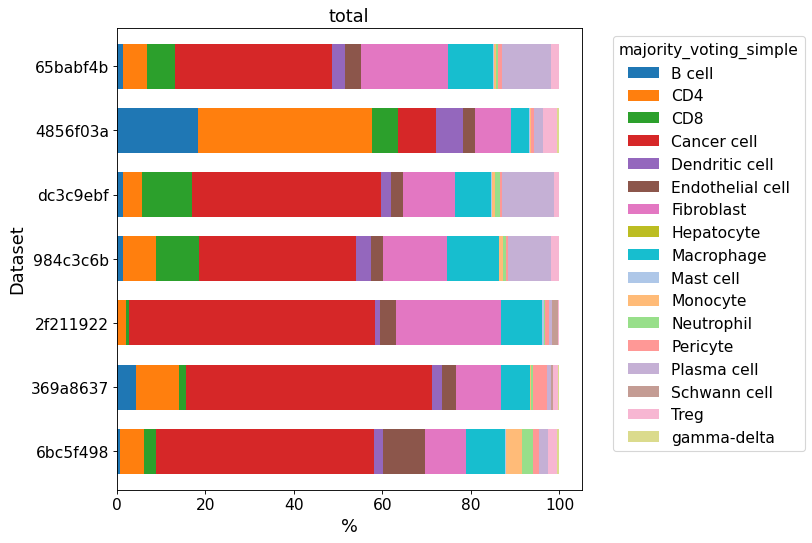

In [30]:
plot_cellular_composition(
    data=exp, cell_type_col="majority_voting_simple",
    palette=exp.colors["majority_voting_simple"],
    cells_layer="proseg", plot_type="barh",
    # savepath="figures/cellcomp-all_datasets-no_annotations.pdf"
)

Since the unique IDs are not very meaningful, one can also use a different unique column for labelling. Here we will generate a unique naming based on the slide ID and the sample ID.

In [31]:
exp.append_metadata(
    new_metadata={
        "unique_sample_name": [f"{row['slide_id']}-{row['sample_id']}" for i, row in exp.metadata.iterrows()]
        },
    by=None
    )

C:\Users\ge37voy\Github\InSituPy\insitupy\_core\insituexperiment.py:384: UserWarning: No 'by' column provided. Metadata will be paired by order.
  warnings.warn("No 'by' column provided. Metadata will be paired by order.")


Saving figure to file figures/cellcomp-all_datasets-no_annotations.pdf
Saved.


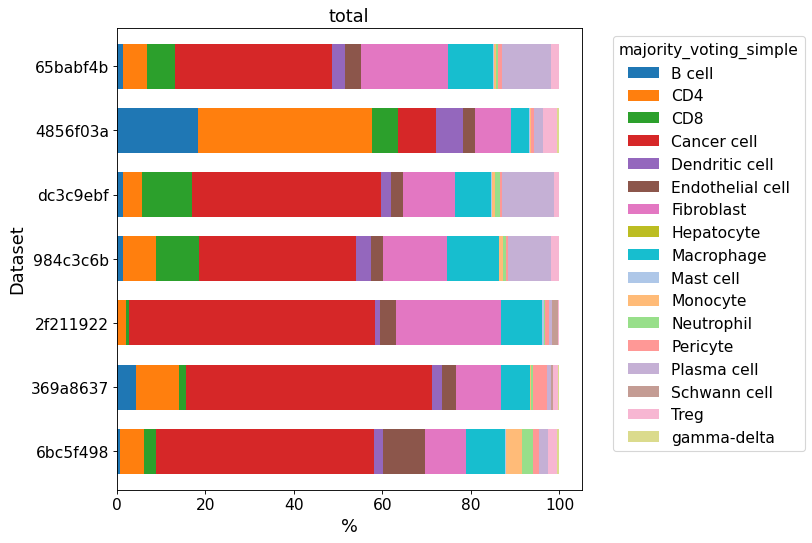

In [35]:
plot_cellular_composition(
    data=exp, cell_type_col="majority_voting_simple",
    palette=exp.colors["majority_voting_simple"],
    cells_layer="proseg", plot_type="barh",
    savepath="figures/cellcomp-all_datasets-no_annotations.pdf"
)

Alternatively, one can plot it vertically.

here


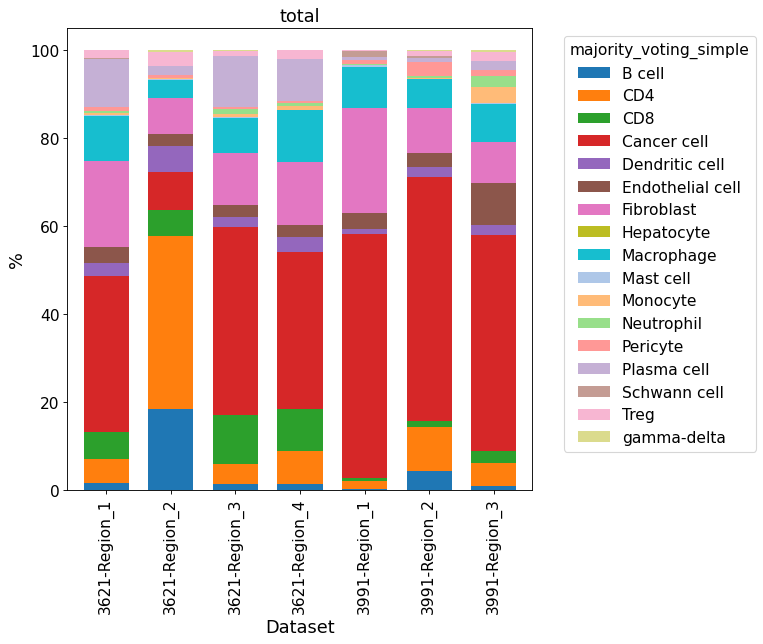

In [47]:
plot_cellular_composition(
    data=exp, cell_type_col="majority_voting_simple",
    cells_layer="proseg", plot_type="bar",
    groupby="unique_sample_name",
    # savepath="figures/cellcomp-all_datasets-no_annotations.pdf"
)

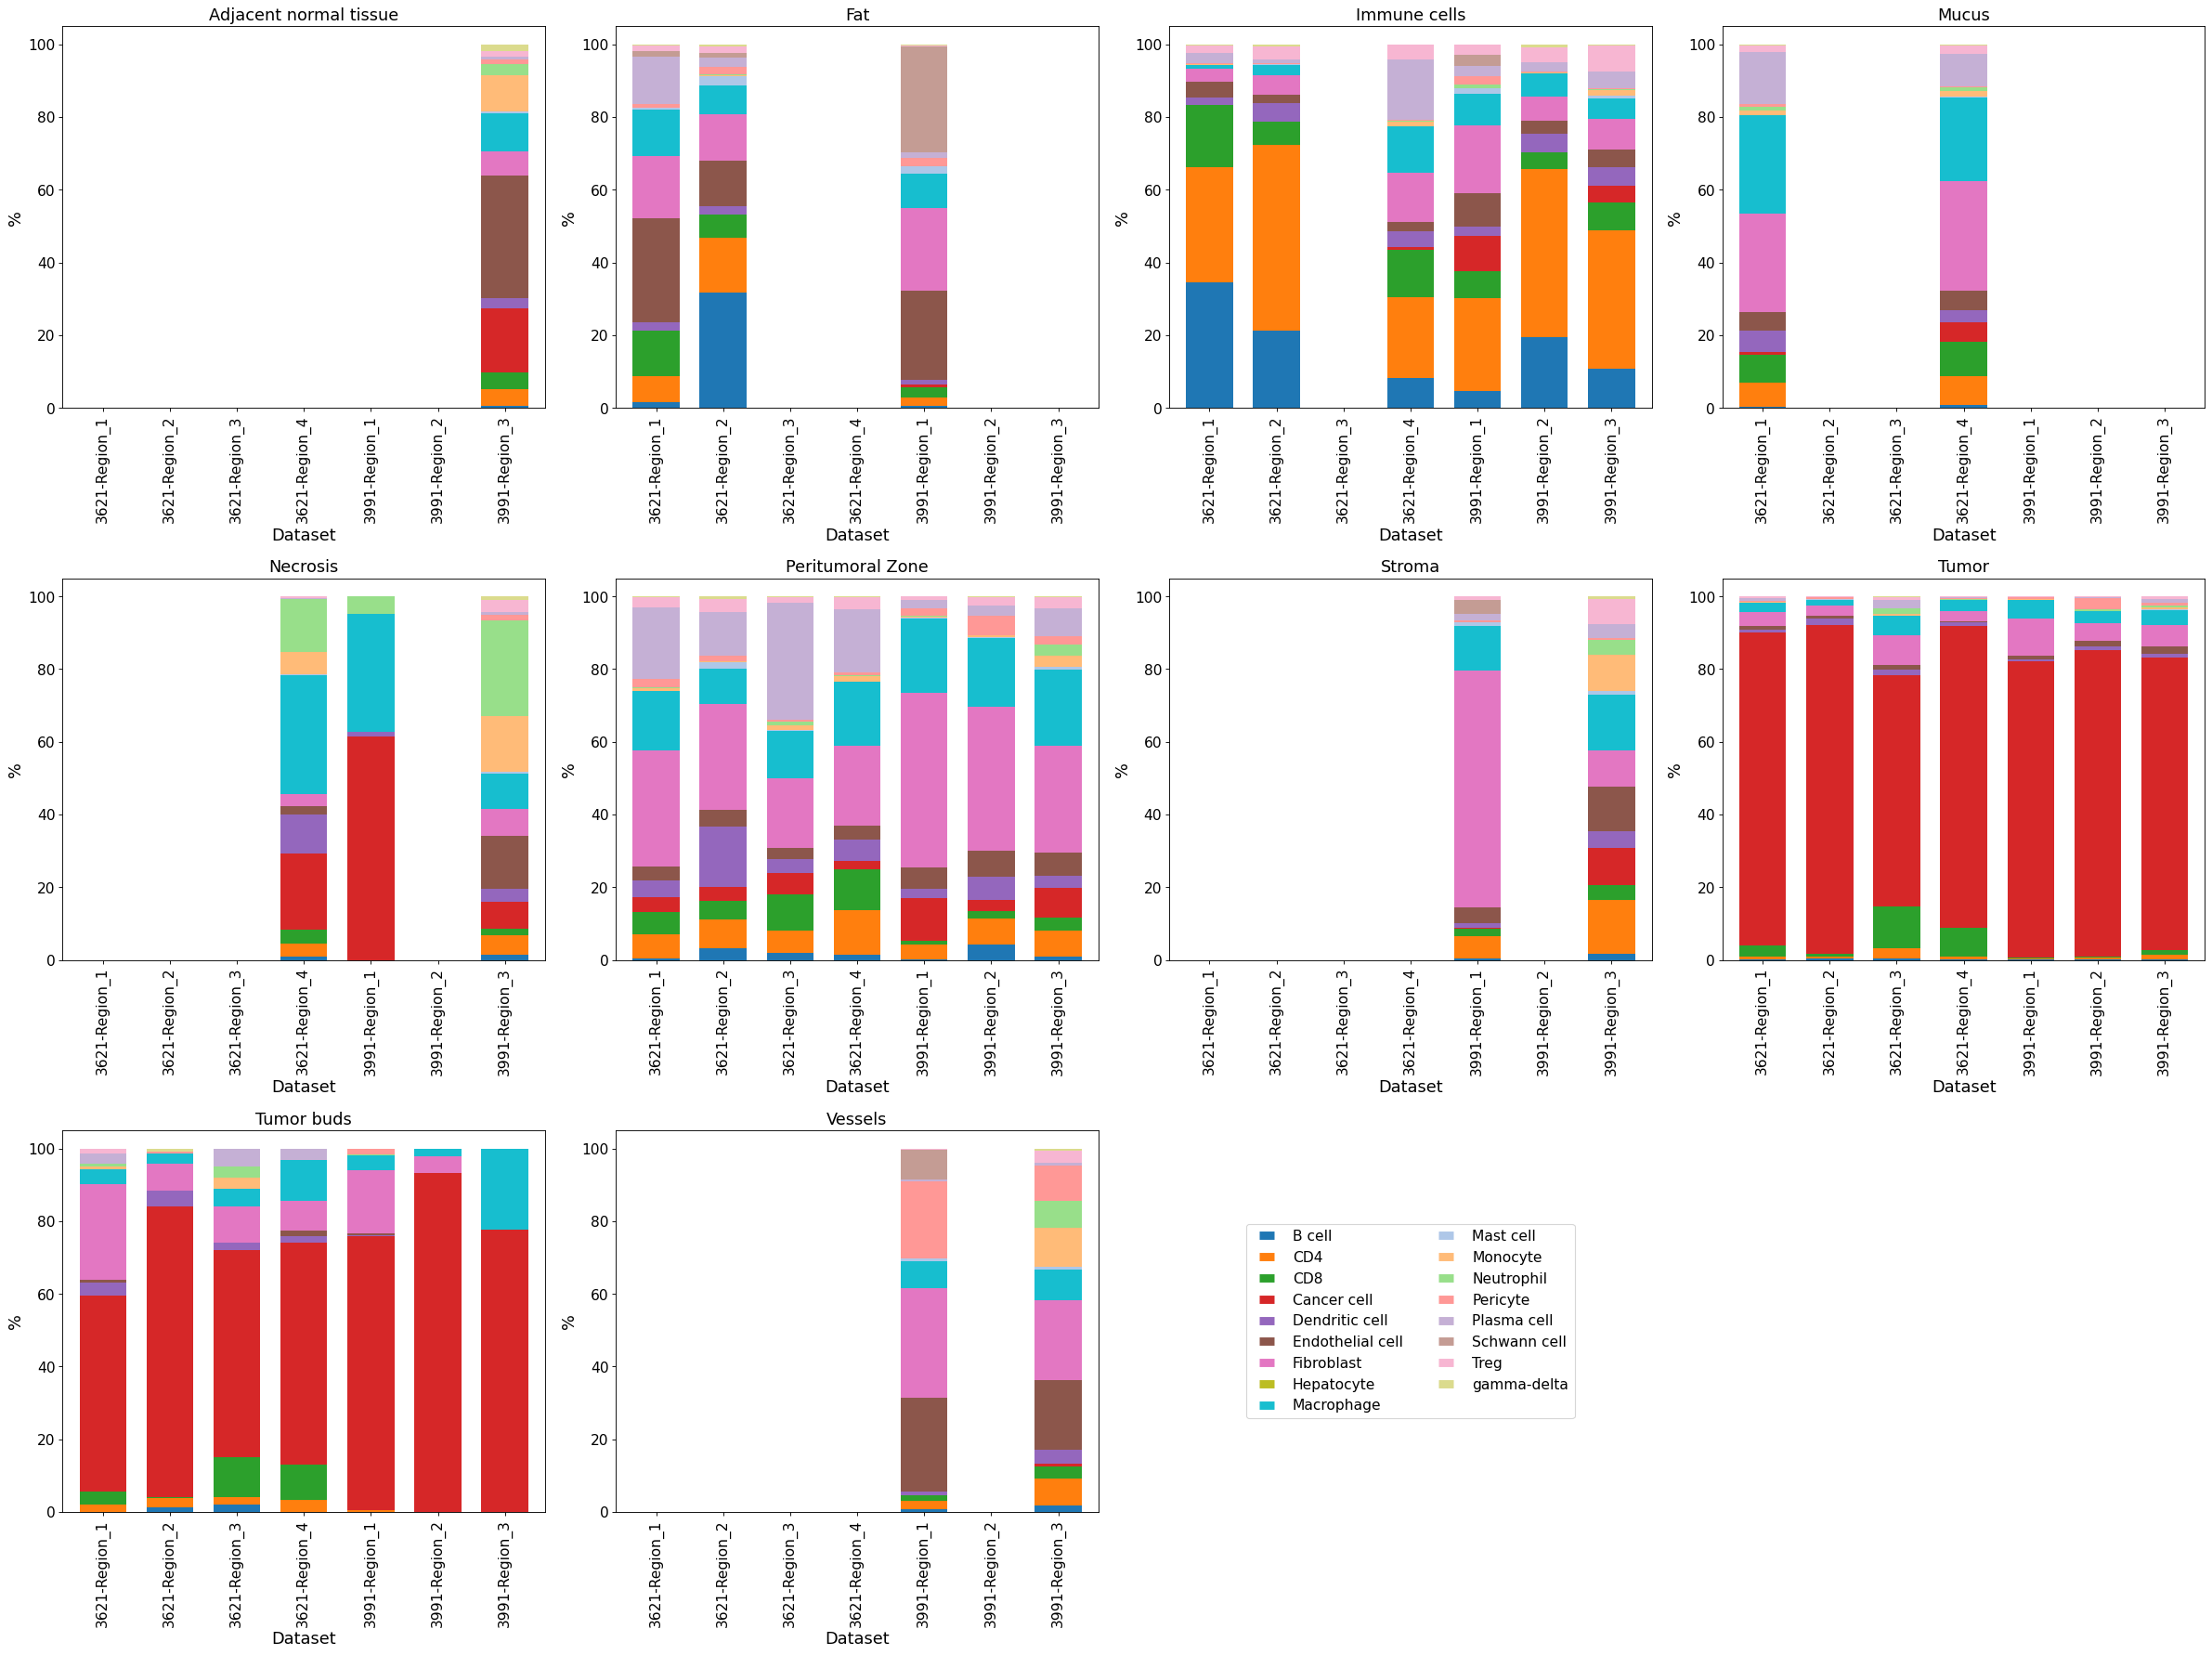

In [ ]:
plot_cellular_composition(
    data=exp, cell_type_col="majority_voting_simple",
    cells_layer="proseg",
    geom_key="Tanja", modality="annotations",
    plot_type="bar",
    groupby="unique_sample_name",
    #savepath="figures/cellcomp-all_datasets-annotations_Tanja.pdf"
)

Saving figure to file figures/cellcomp-all_datasets-annotations_Tanja_selected.pdf
Saved.


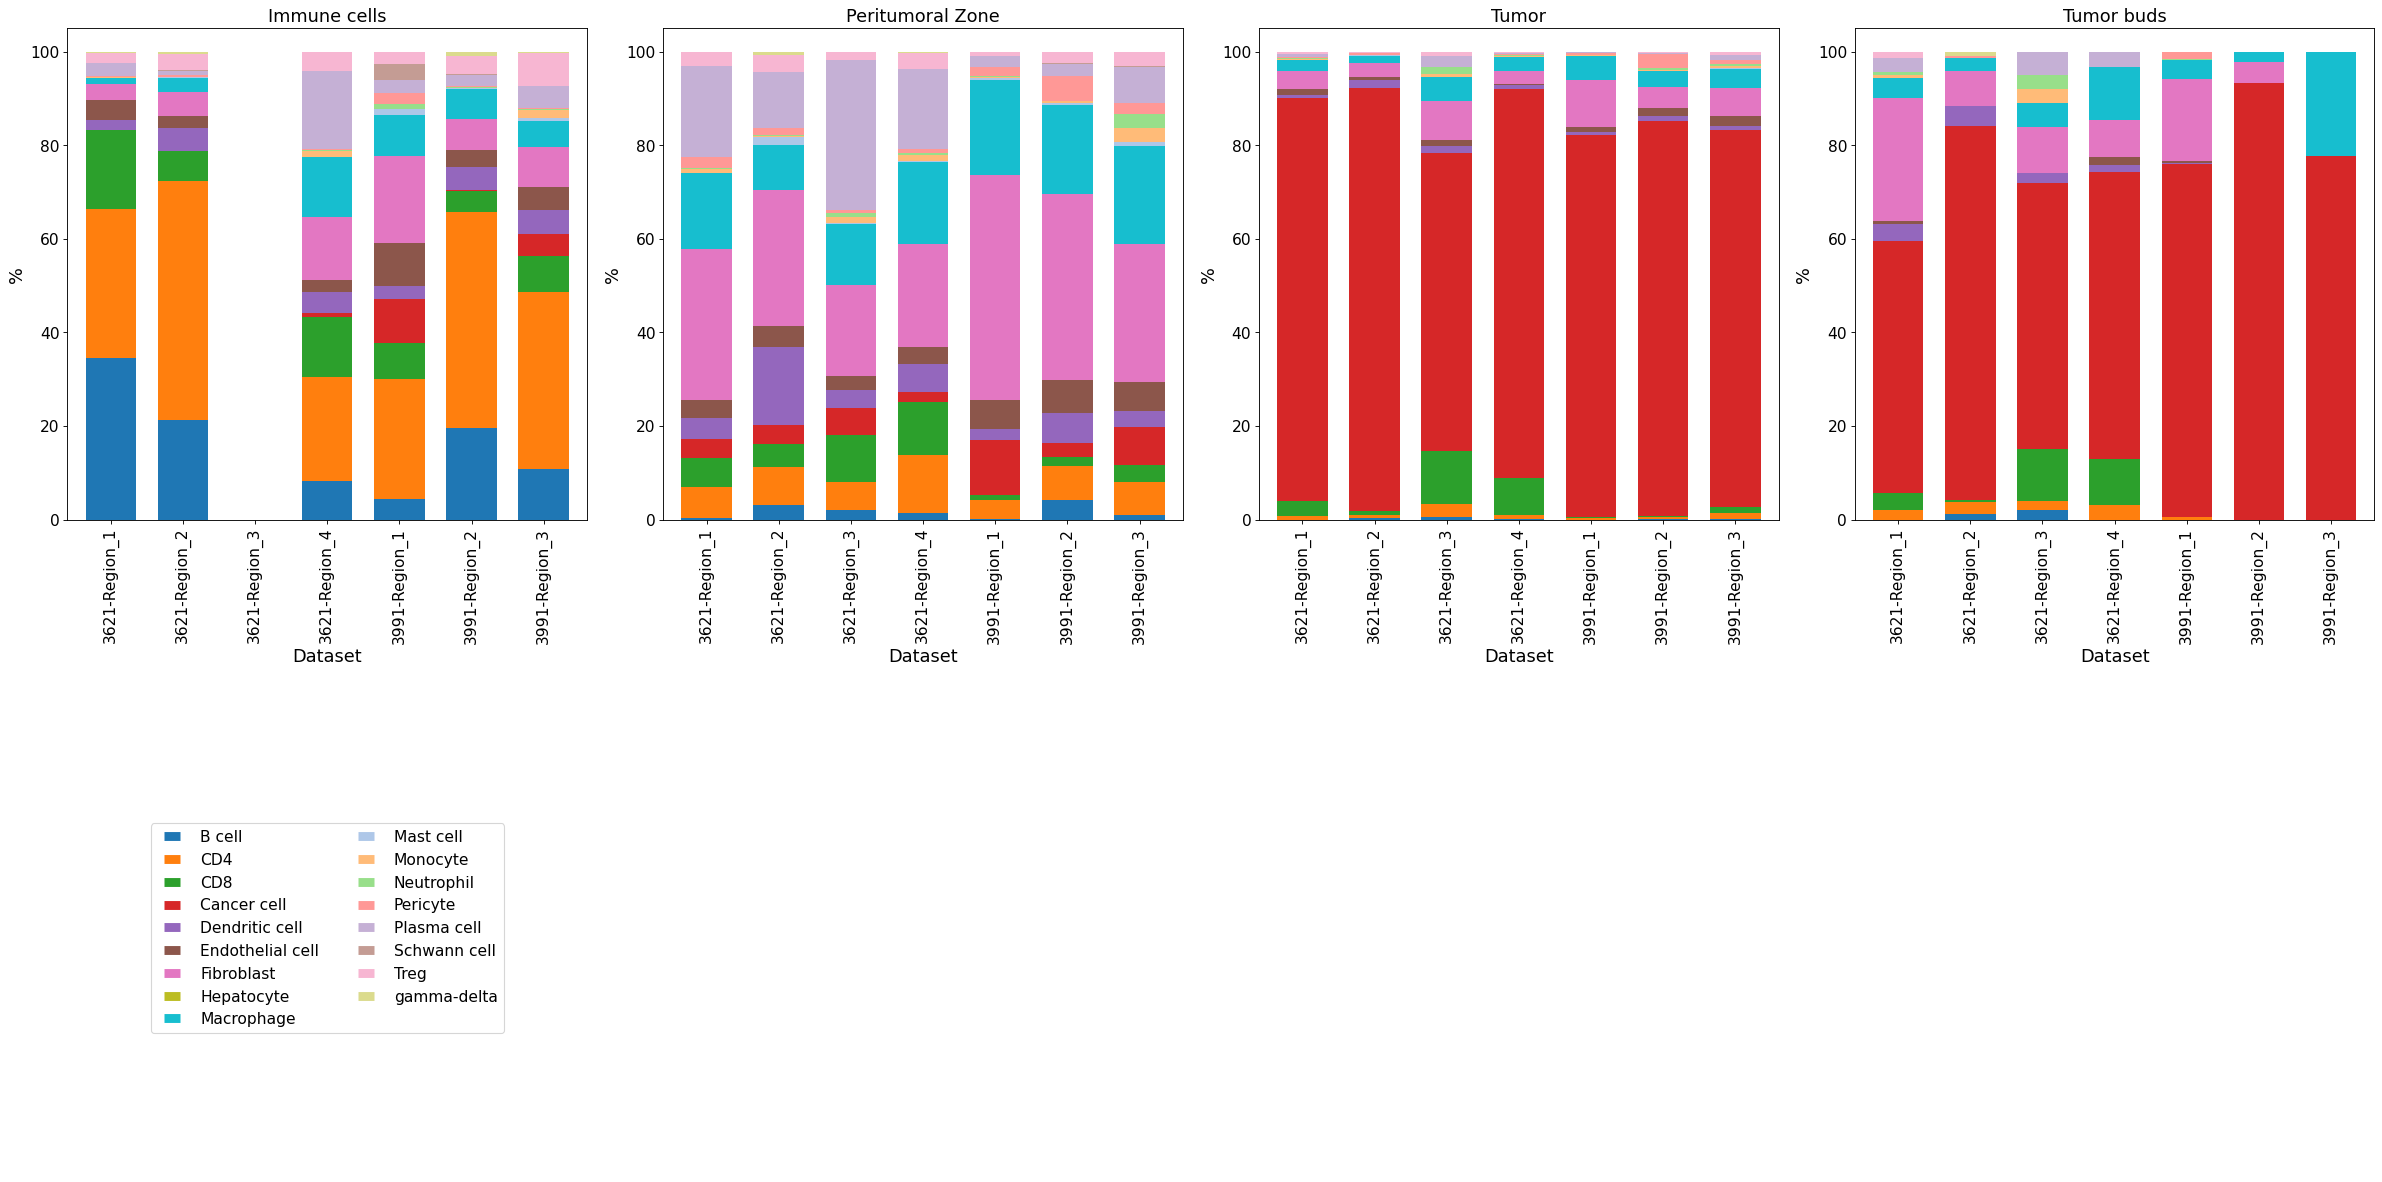

In [50]:
selected_cats = ["Tumor", "Tumor buds", "Peritumoral Zone", "Immune cells"]
plot_cellular_composition(
    data=exp, cell_type_col="majority_voting_simple",
    cells_layer="proseg",
    geom_key="Tanja", geom_values=selected_cats,
    modality="annotations",
    plot_type="bar",
    groupby="unique_sample_name",
    savepath="figures/cellcomp-all_datasets-annotations_Tanja_selected.pdf"
)

### Subsetting data before plotting

Plot only the colon samples:

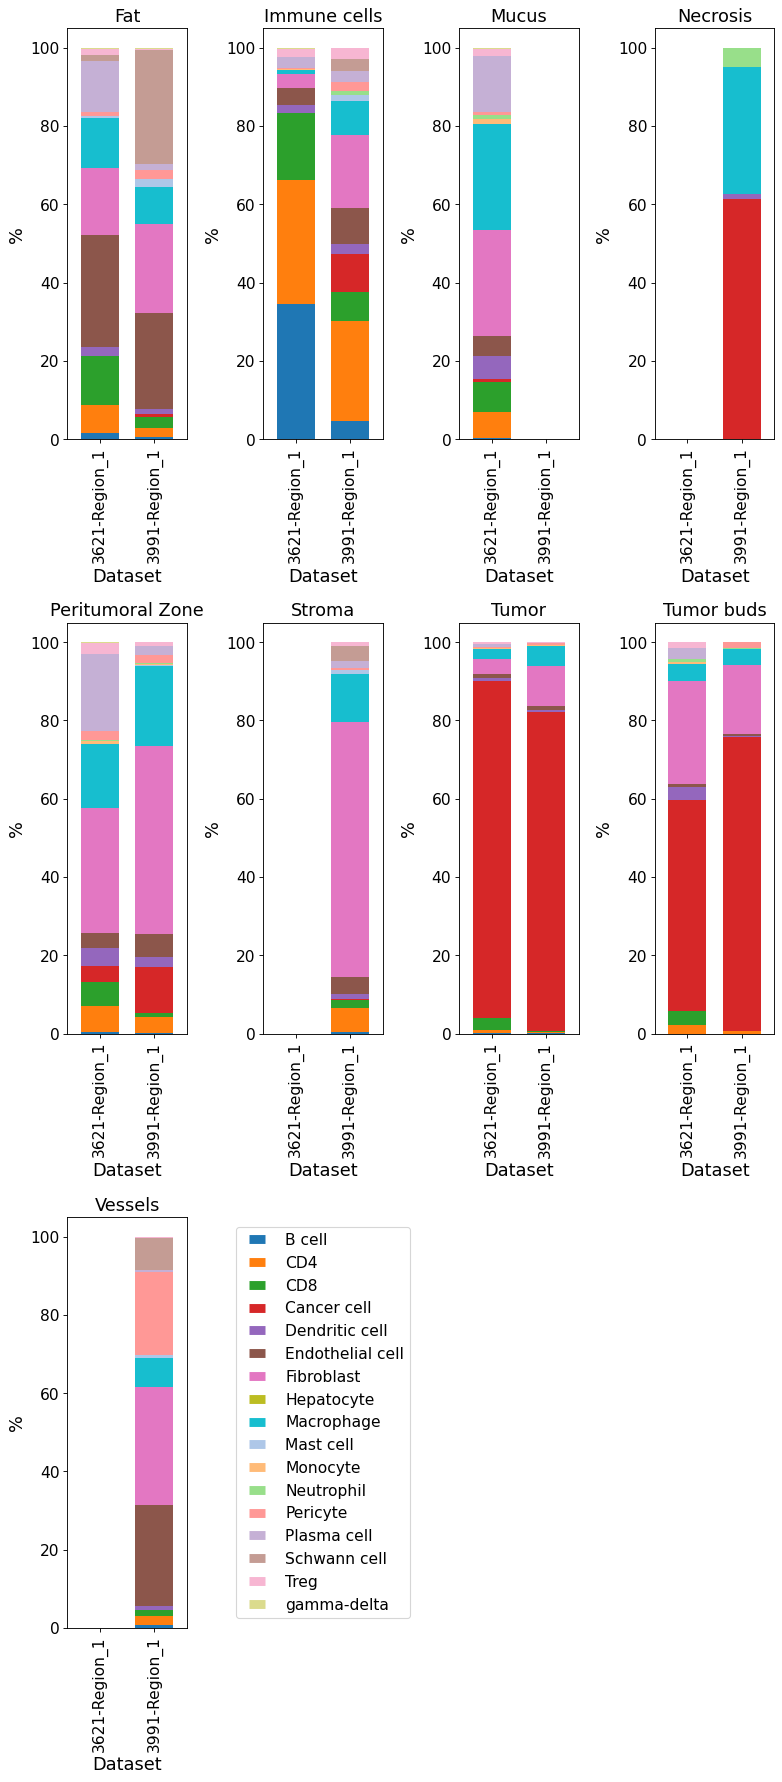

In [52]:
plot_cellular_composition(
    data=exp.query(
        criteria="Tissue == 'Colon'"
        ),
    cell_type_col="majority_voting_simple",
    cells_layer="proseg",
    geom_key="Tanja",
    modality="annotations",
    groupby="unique_sample_name",
    plot_type="bar",
    legend_max_per_col=20 # subplots get high aspect ratio here, requiring adaptation of legend
)

## Save results

In [53]:
exp.save()

100%|██████████| 7/7 [02:15<00:00, 19.29s/it]


## Plotting annotations

The following section demonstrates how the `annotations_key` argument in `plot_spatial` can be used to visualize annotations across multiple samples.

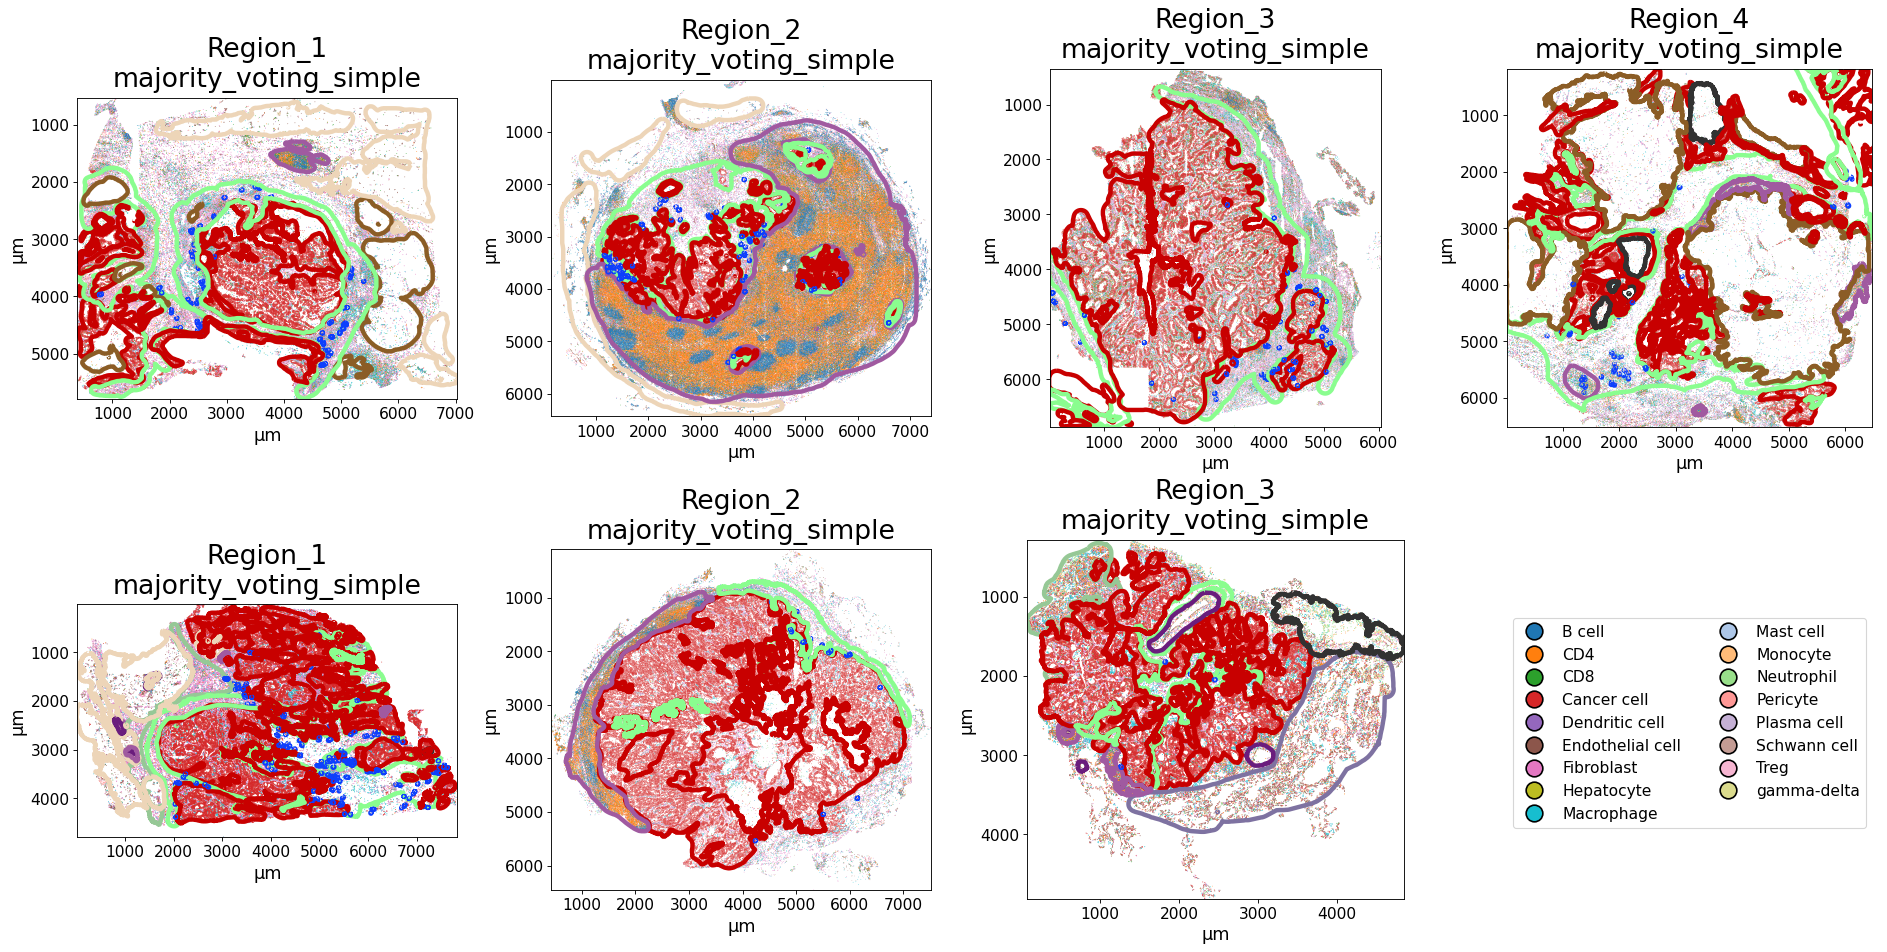

In [115]:
plot_spatial(exp, cells_layer="proseg",
             keys="majority_voting_simple", spot_size=12,
             annotations_key="Tanja"
             #savepath="figures/spatial-all-majority_voting_simple.png"
             )

Synchronized colors for key 'majority_voting_simple' and palette 'tab20_mod'.


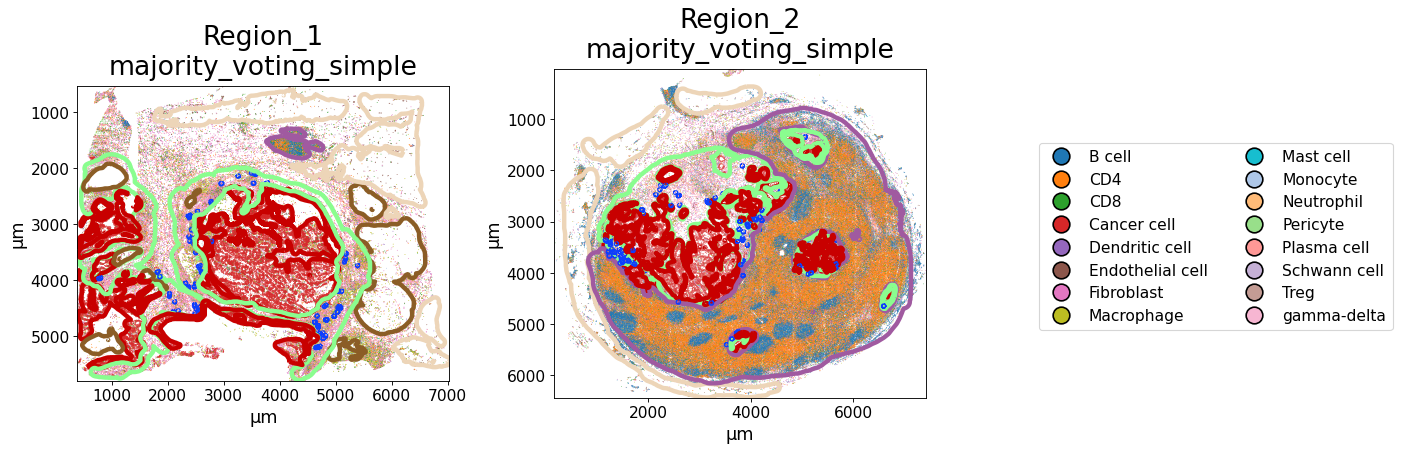

In [116]:
plot_spatial(exp[:2], cells_layer="proseg",
             keys="majority_voting_simple", spot_size=12,
             annotations_key=("Tanja", None)
             #savepath="figures/spatial-all-majority_voting_simple.png"
             )

Synchronized colors for key 'majority_voting_simple' and palette 'tab20_mod'.


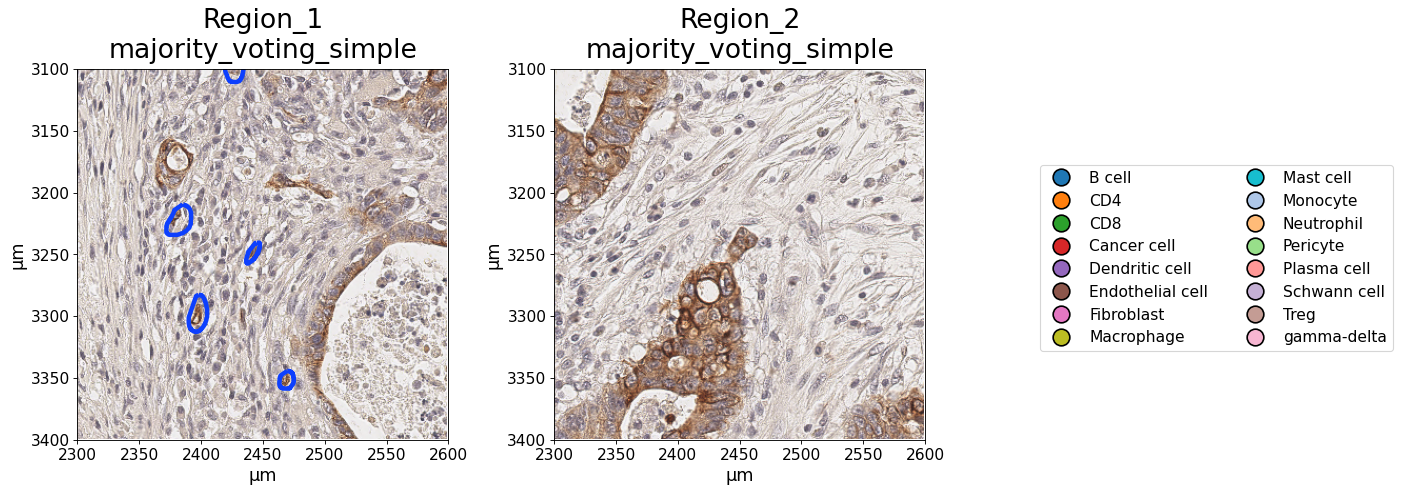

In [117]:
plot_spatial(exp[:2], cells_layer="proseg",
             keys="majority_voting_simple", spot_size=12,
             annotations_key=("Tanja", "Tumor buds"),
             alpha=0,
             xlim=(2300,2600), ylim=(3100,3400),
             image_key="panCK"
             #savepath="figures/spatial-all-majority_voting_simple.png"
             )

One can also use the `annotations_mode="filled"` for the annotations.

Synchronized colors for key 'majority_voting_simple' and palette 'tab20_mod'.


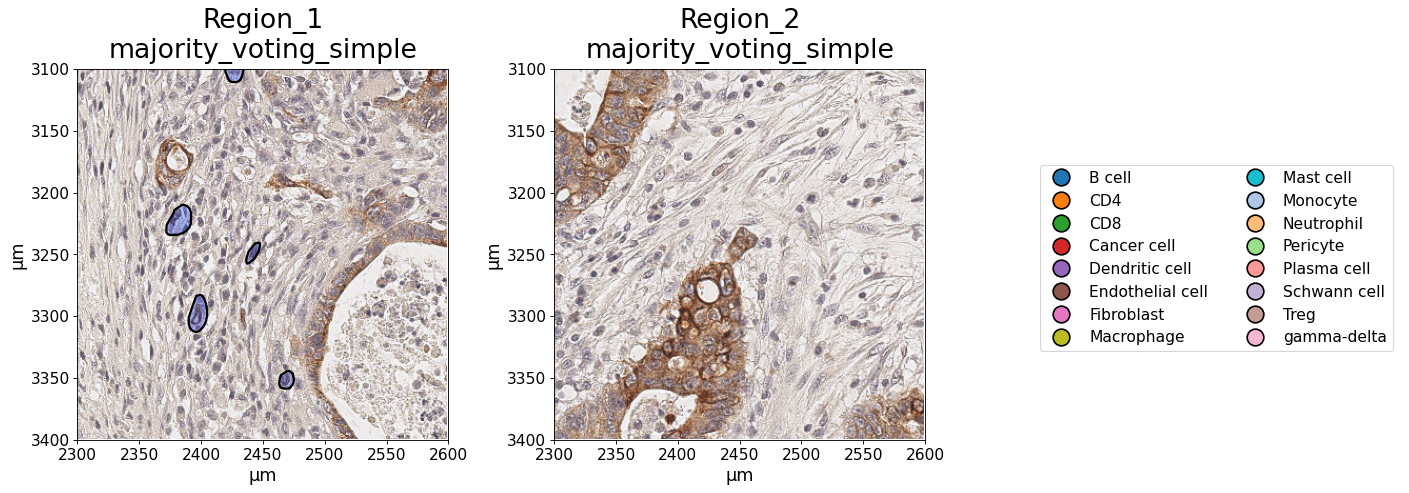

In [128]:
plot_spatial(exp[:2], cells_layer="proseg",
             keys="majority_voting_simple", spot_size=12,
             annotations_key=("Tanja", "Tumor buds"),
             annotations_mode="filled",
             alpha=0,
             xlim=(2300,2600), ylim=(3100,3400),
             image_key="panCK"
             #savepath="figures/spatial-all-majority_voting_simple.png"
             )

Synchronized colors for key 'majority_voting_simple' and palette 'tab20_mod'.


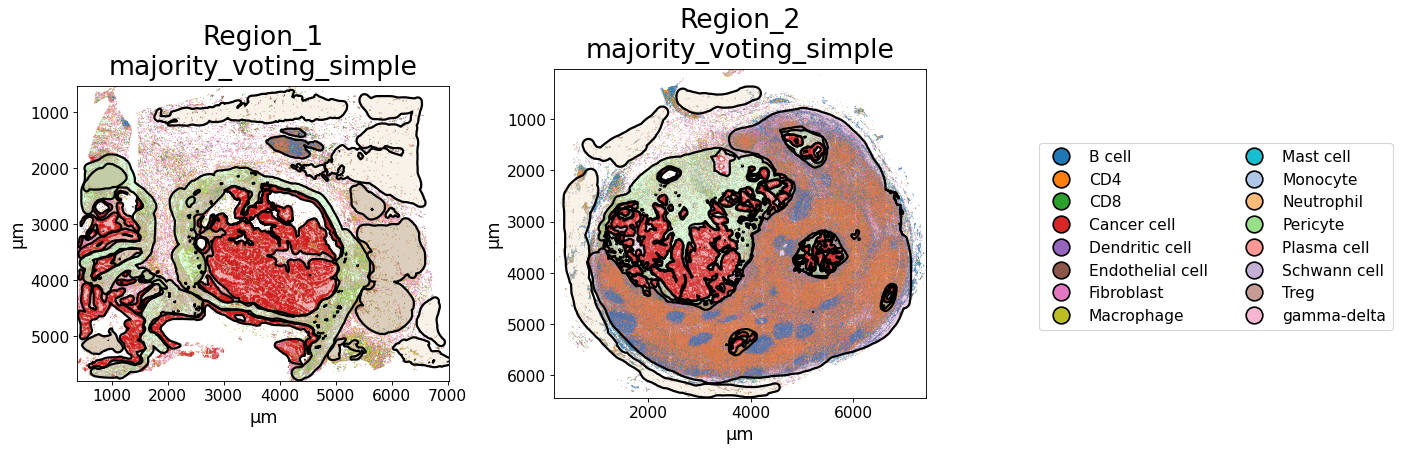

In [127]:
plot_spatial(exp[:2], cells_layer="proseg",
             keys="majority_voting_simple", spot_size=12,
             annotations_key=("Tanja", None),
             annotations_mode="filled"
             #savepath="figures/spatial-all-majority_voting_simple.png"
             )